In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [4]:
#load data
data = pd.read_csv("..\Data\Day\S&P 500 Historical Data00-20.csv")

In [5]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/14/2019,"3,096.63","3,090.75","3,098.20","3,083.26",NaN,0.08%
1,11/13/2019,"3,094.04","3,084.18","3,098.06","3,078.80",NaN,0.07%
2,11/12/2019,"3,091.84","3,089.28","3,102.61","3,084.73",NaN,0.16%
3,11/11/2019,"3,087.01","3,080.33","3,088.33","3,075.82",NaN,-0.20%
4,11/08/2019,"3,093.08","3,081.25","3,093.09","3,073.58",NaN,0.26%


In [6]:
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.Price = data.Price.str.replace(',', '').astype(float) # Here price is equal to close
data.High = data.High.str.replace(',', '').astype(float)
data.Low = data.Low.str.replace(',', '').astype(float)
data.Open = data.Open.str.replace(',', '').astype(float)
data = data.drop("Vol.", axis = 1)

In [7]:
special_data = pd.DataFrame(data)

In [8]:
special_data = data[(data['Date'] > '2010-01-01') & (data['Date'] < '2015-01-01')]
special_data.index = data.index[:len(special_data)]

In [9]:
#change indexes
special_data.set_index('Date', inplace = True)

In [10]:
data.head(10)

,Date,Price,Open,High,Low,Change %,Timestamp
4999,2000-01-03,1455.2,1469.2,1478.0,1438.4,-0.95%,01/03/2000
4998,2000-01-04,1399.4,1455.2,1455.2,1397.4,-3.83%,01/04/2000
4997,2000-01-05,1402.1,1399.4,1413.3,1377.7,0.19%,01/05/2000
4996,2000-01-06,1403.5,1402.1,1411.9,1392.0,0.10%,01/06/2000
4995,2000-01-07,1441.5,1403.5,1441.5,1400.5,2.71%,01/07/2000
4994,2000-01-10,1457.6,1441.5,1464.4,1441.5,1.12%,01/10/2000
4993,2000-01-11,1438.6,1457.6,1458.8,1434.4,-1.30%,01/11/2000
4992,2000-01-12,1432.2,1439.1,1445.3,1427.3,-0.44%,01/12/2000
4991,2000-01-13,1449.7,1432.2,1454.6,1432.2,1.22%,01/13/2000
4990,2000-01-14,1465.2,1449.7,1473.0,1449.7,1.07%,01/14/2000


In [11]:
special_data.head(10)

,Price,Open,High,Low,Change %,Timestamp
Date,,,,,,
2010-01-04,1132.99,1116.56,1133.87,1116.56,1.60%,01/04/2010
2010-01-05,1136.52,1132.66,1136.63,1129.66,0.31%,01/05/2010
2010-01-06,1137.14,1135.71,1139.19,1133.95,0.05%,01/06/2010
2010-01-07,1141.69,1136.27,1142.46,1131.32,0.40%,01/07/2010
2010-01-08,1144.98,1140.52,1145.39,1136.22,0.29%,01/08/2010
2010-01-11,1146.98,1145.96,1149.74,1142.02,0.17%,01/11/2010
2010-01-12,1136.22,1143.81,1143.81,1131.77,-0.94%,01/12/2010
2010-01-13,1145.68,1137.31,1148.40,1133.18,0.83%,01/13/2010
2010-01-14,1148.46,1145.68,1150.41,1143.80,0.24%,01/14/2010


In [12]:
special_data['new_index'] = special_data.Price
special_data['new_date'] = special_data.Price
special_data.head()

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_28524\2126971332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['new_index'] = special_data.Price
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_28524\2126971332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['new_date'] = special_data.Price


,Price,Open,High,Low,Change %,Timestamp,new_index,new_date
Date,,,,,,,,
2010-01-04,1132.99,1116.56,1133.87,1116.56,1.60%,01/04/2010,1132.99,1132.99
2010-01-05,1136.52,1132.66,1136.63,1129.66,0.31%,01/05/2010,1136.52,1136.52
2010-01-06,1137.14,1135.71,1139.19,1133.95,0.05%,01/06/2010,1137.14,1137.14
2010-01-07,1141.69,1136.27,1142.46,1131.32,0.40%,01/07/2010,1141.69,1141.69
2010-01-08,1144.98,1140.52,1145.39,1136.22,0.29%,01/08/2010,1144.98,1144.98


In [13]:
import datetime

special_data.loc[0, 'new_index'] = 1262563200
special_data.loc[0, 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[0, 'new_index']).strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.loc[i, 'new_index'] = special_data.new_index[i - 1] + 86400
        special_data.loc[i, 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[i, 'new_index']).strftime('%Y-%m-%d %H:%M:%S')

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_28524\3138587451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data.loc[0, 'new_index'] = 1262563200
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_28524\3138587451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data.loc[0, 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[0, 'new_index']).strftime('%Y-%m-%d %H:%M:%S')
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_28524\3138587451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [14]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace = True)

In [15]:
special_data.head(20)

,Price,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2010-01-04 07:00:00,1132.99,1116.56,1133.87,1116.56,1.60%,01/04/2010,1.262563e+09
2010-01-05 07:00:00,1136.52,1132.66,1136.63,1129.66,0.31%,01/05/2010,1.262650e+09
2010-01-06 07:00:00,1137.14,1135.71,1139.19,1133.95,0.05%,01/06/2010,1.262736e+09
2010-01-07 07:00:00,1141.69,1136.27,1142.46,1131.32,0.40%,01/07/2010,1.262822e+09
2010-01-08 07:00:00,1144.98,1140.52,1145.39,1136.22,0.29%,01/08/2010,1.262909e+09
2010-01-09 07:00:00,1146.98,1145.96,1149.74,1142.02,0.17%,01/11/2010,1.262995e+09
2010-01-10 07:00:00,1136.22,1143.81,1143.81,1131.77,-0.94%,01/12/2010,1.263082e+09
2010-01-11 07:00:00,1145.68,1137.31,1148.40,1133.18,0.83%,01/13/2010,1.263168e+09
2010-01-12 07:00:00,1148.46,1145.68,1150.41,1143.80,0.24%,01/14/2010,1.263254e+09


In [19]:
special_data.rename(columns={'Price': 'Close'}, inplace=True)

In [17]:
from scalecast.Forecaster import Forecaster
f = Forecaster(y = special_data['Price'], 
               current_dates = special_data.index)

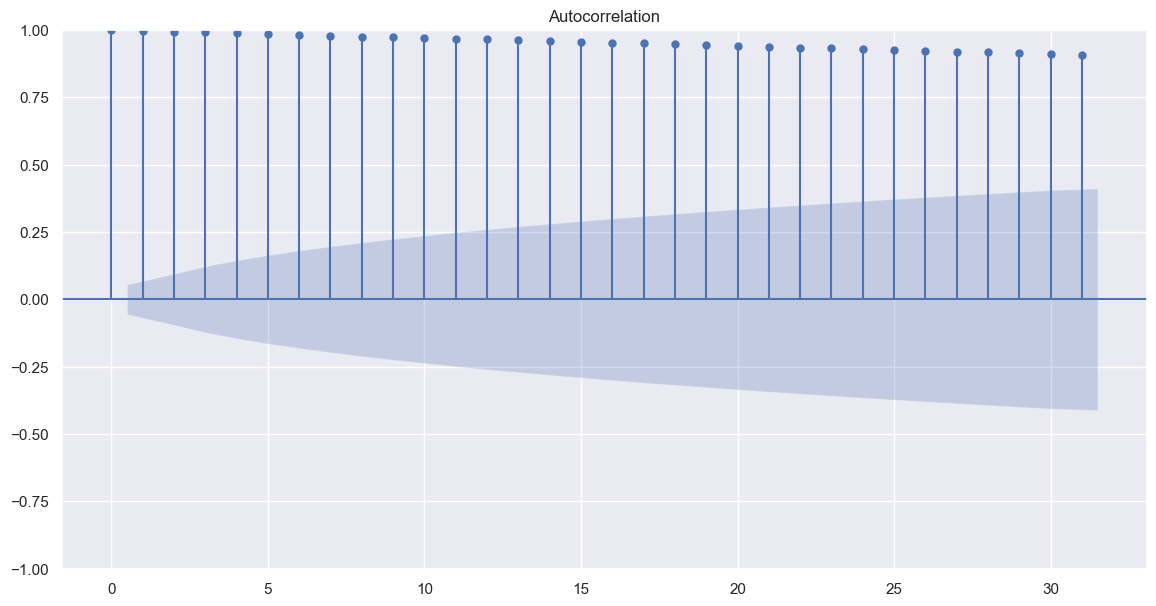

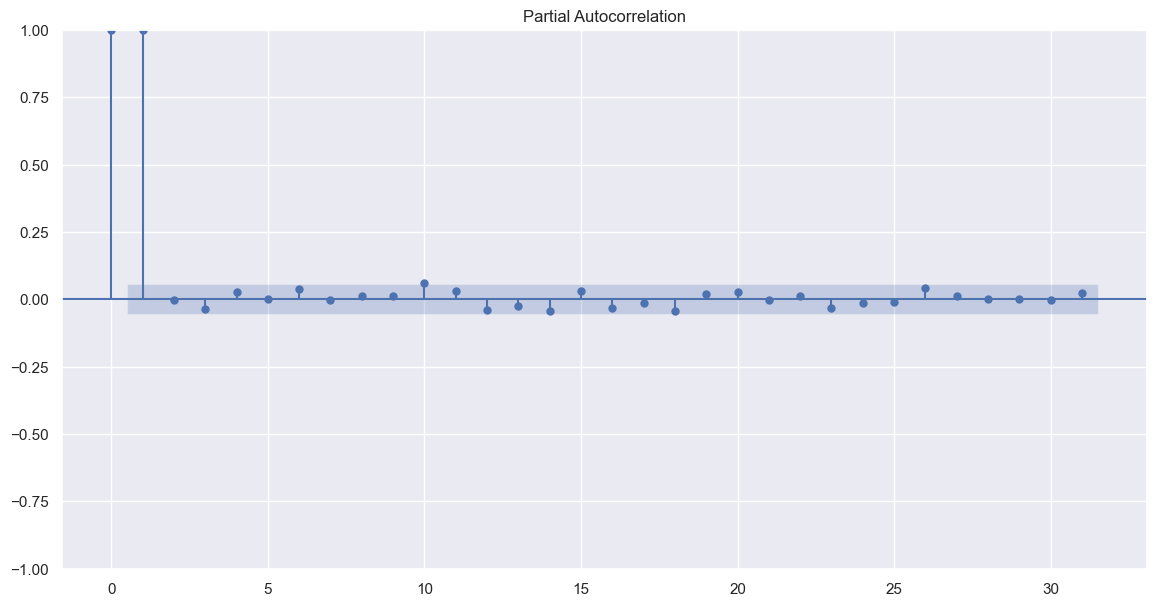

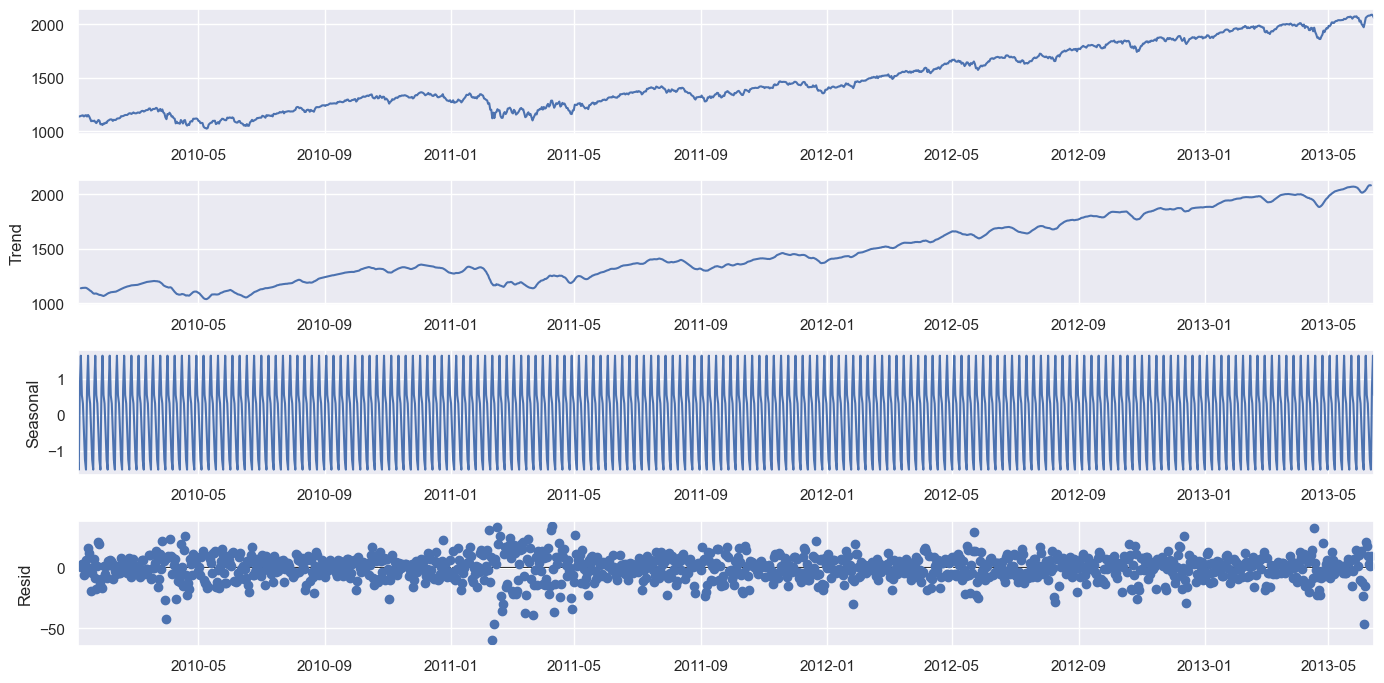

0.2766677391616034
0.9762483249209334


In [18]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

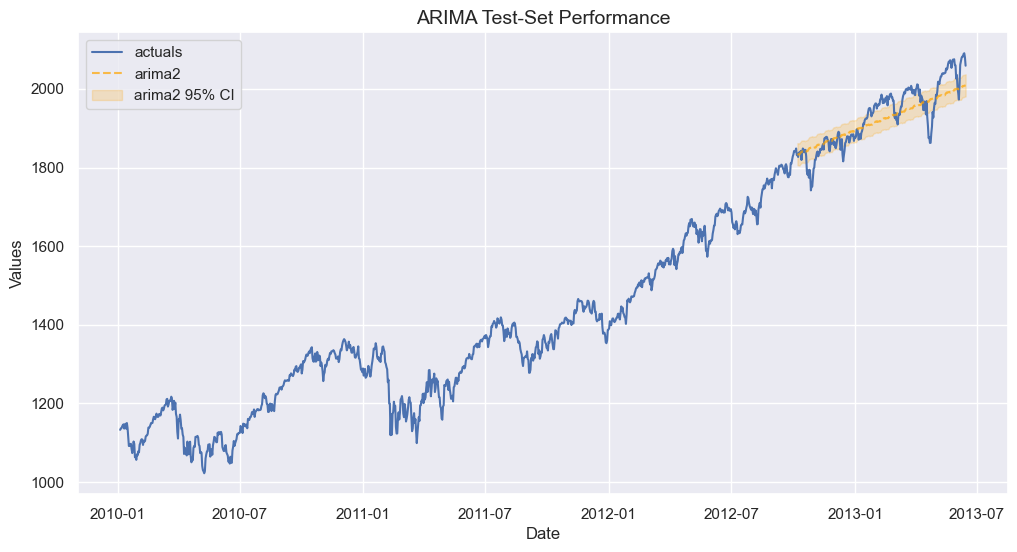

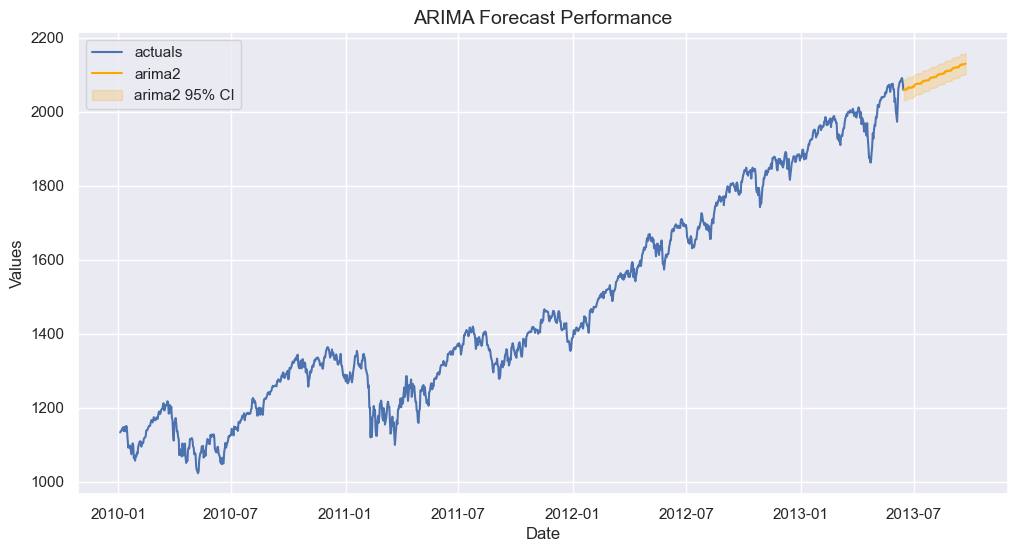

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                 1258
Model:             ARIMA(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -5031.638
Date:                          Sat, 14 Oct 2023   AIC                          10077.276
Time:                                  23:38:27   BIC                          10113.164
Sample:                                       0   HQIC                         10090.770
                                         - 1258                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8177      0.098     -8.334      0.000      -1.010      -0.625
ar.L2          0.0151      0.028      0.534      0.594      -0.040       0.070
ma.L1          0.7768      0.095      8.154      0.000       0.590       0.963
ar.S.L12      -0.0140      0.026     -0.534      0.594      -0.066       0.037
ar.S.L24       0.0255      0.030      0.849      0.396      -0.033       0.084
ma.S.L12      -0.9998      0.923     -1.084      0.279      -2.808       0.808
sigma2       181.4583    166.207      1.092      0.275    -144.301     507.217
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               273.70
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.32
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci = True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci = True, models = 'arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

In [33]:
# Разделение данных на train и test
train_size = int(0.8 * len(special_data))  # 80% данных для обучения
train_data = pd.DataFrame({
    'ds': special_data.iloc[:train_size].index,
    'y' : special_data.iloc[:train_size].Price})
test_data = pd.DataFrame({
    'ds': special_data.iloc[train_size:].index,
    'y' : special_data.iloc[train_size:].Price})

In [34]:
train_size

1006

In [36]:
from prophet import Prophet

# Создание и обучение модели Prophet
model = Prophet(daily_seasonality = False)  # Указываем, что у нас есть ежедневная сезонность
model.fit(train_data.reset_index())

02:22:08 - cmdstanpy - INFO - Chain [1] start processing
02:22:08 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
# Создание фрейма для прогнозирования
future = pd.DataFrame(index = test_data.index)
future['ds'] = test_data.index

In [39]:
# Получение прогнозов
forecast = model.predict(future)

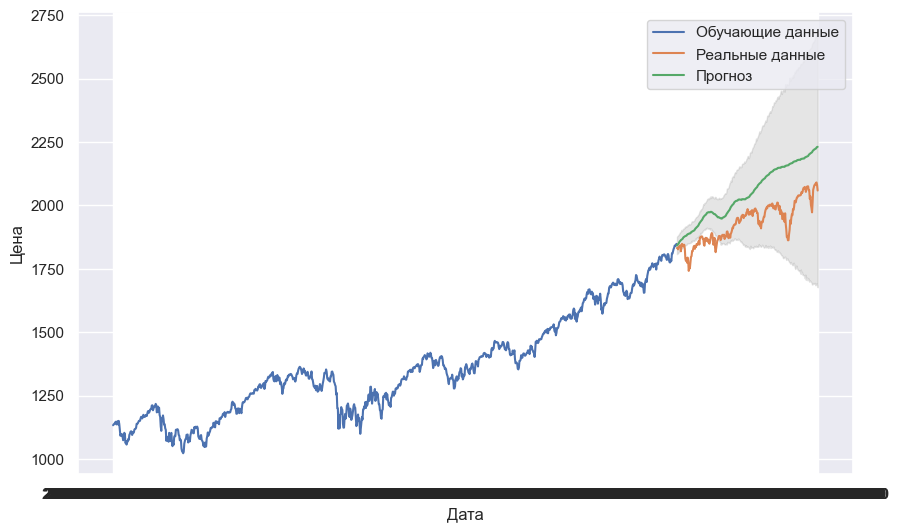

In [40]:
# Визуализация результатов
fig = plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['y'], label='Обучающие данные')
plt.plot(test_data.index, test_data['y'], label='Реальные данные')
plt.plot(test_data.index, forecast['yhat'], label='Прогноз')
plt.fill_between(test_data.index, forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha = 0.2)
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()